In [1]:
import pandas as pd
import json
import re
import numpy as np
import ast
import matplotlib.pyplot as plt

In [34]:
train = pd.read_json('./origin_data_modify/train_mod4.json', typ='frame')
type(train['tags'])

pandas.core.series.Series

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109282 entries, 0 to 109281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          109282 non-null  object
 1   id            109282 non-null  int64 
 2   plylst_title  109282 non-null  object
 3   songs         109282 non-null  object
 4   like_cnt      109282 non-null  int64 
 5   updt_date     109282 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.8+ MB


In [4]:
type(train['songs'][0])

str

In [5]:
train['songs'] = train['songs'].apply(lambda x: ast.literal_eval(x))
type(train['songs'][0])

list

In [7]:
len(train['songs'][0])

36

In [8]:
train['songs_cnt'] = train['songs'].apply(lambda x : len(x))
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,36
1,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,39
2,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37
3,[Pop],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000,34
4,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16


In [9]:
train['songs_cnt'].describe()
# 평균 46개, 25% 19개, 50% 30개

count    109282.000000
mean         46.051180
std          44.294817
min           1.000000
25%          19.000000
50%          30.000000
75%          53.000000
max         200.000000
Name: songs_cnt, dtype: float64

In [10]:
train_song_cnt = train.groupby('songs_cnt').count()['id'].reset_index().rename(columns={'id':'ply_cnt'})
train_song_cnt['cum_sum'] = train_song_cnt['ply_cnt'].cumsum()
train_song_cnt

,songs_cnt,ply_cnt,cum_sum
0,1,29,29
1,2,47,76
2,3,36,112
3,4,93,205
4,5,429,634
...,...,...,...
195,196,44,105406
196,197,45,105451
197,198,37,105488
198,199,54,105542


In [11]:
train_song_cnt['rate'] = train_song_cnt['ply_cnt'].apply(lambda x: x/train_song_cnt['ply_cnt'].sum()*100)
train_song_cnt['cum_rate'] = train_song_cnt['rate'].cumsum()

In [12]:
train_song_cnt.describe()

,songs_cnt,ply_cnt,cum_sum,rate,cum_rate
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,546.410000,84665.585000,0.500000,77.474410
std,57.879185,901.083598,29208.711596,0.824549,26.727834
min,1.000000,27.000000,29.000000,0.024707,0.026537
25%,50.750000,60.750000,80627.250000,0.055590,73.779076
50%,100.500000,163.500000,98600.000000,0.149613,90.225289
75%,150.250000,567.500000,103347.250000,0.519299,94.569325
max,200.000000,7113.000000,109282.000000,6.508849,100.000000


In [13]:
train_song_cnt.iloc[99:101, :]

,songs_cnt,ply_cnt,cum_sum,rate,cum_rate
99,100,590,98507,0.539888,90.140188
100,101,186,98693,0.170202,90.310390


In [14]:
train_song_cnt.iloc[:19, :]

,songs_cnt,ply_cnt,cum_sum,rate,cum_rate
0,1,29,29,0.026537,0.026537
1,2,47,76,0.043008,0.069545
2,3,36,112,0.032942,0.102487
3,4,93,205,0.085101,0.187588
4,5,429,634,0.392562,0.580150
5,6,312,946,0.285500,0.865650
6,7,384,1330,0.351384,1.217035
7,8,649,1979,0.593876,1.810911
8,9,949,2928,0.868396,2.679307
9,10,2758,5686,2.523746,5.203053


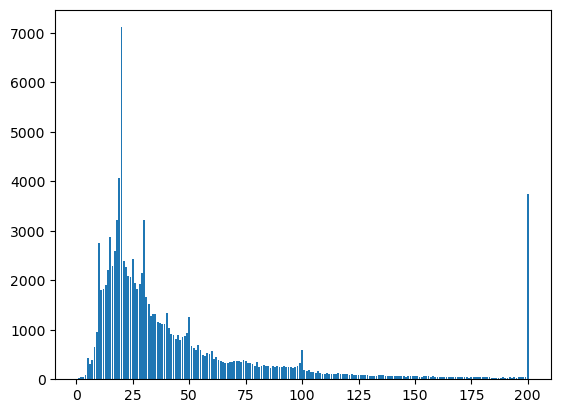

In [15]:
plt.bar(train_song_cnt['songs_cnt'], train_song_cnt['ply_cnt'])
plt.show()

In [16]:
train['songs_cnt'].idxmax()

10

{'whiskers': [<matplotlib.lines.Line2D at 0x14131370490>,
 'caps': [<matplotlib.lines.Line2D at 0x141472c4d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x141472a9550>],
 'medians': [<matplotlib.lines.Line2D at 0x14144e4f850>],
 'fliers': [<matplotlib.lines.Line2D at 0x14144e4f250>],
 'means': []}

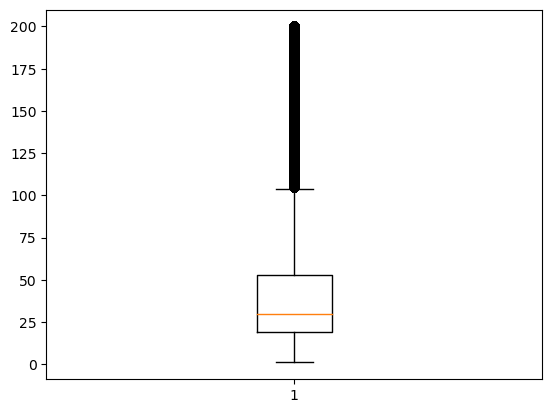

In [17]:
plt.boxplot(train['songs_cnt'])

In [18]:
train[train['songs_cnt'] == 200]

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
10,"[댄스, 힐링]",59022,1990년대 댄스,"[72841, 568089, 311997, 55035, 519662, 494890,...",45,2018-10-12 17:28:11.000,200
54,"[감성, 혼자, 발라드, 추억, 명곡, 그리움, 밤새벽, 이별]",29903,24시간 듣는 슬픈 사랑 이별 발라드,"[531574, 144663, 613464, 532347, 28788, 278092...",36,2017-06-20 16:53:24.000,200
59,[추억],70508,3040 추억의 노래,"[258919, 641640, 264162, 127681, 25144, 75461,...",48,2017-11-14 10:27:24.000,200
117,[차분],62246,Calm,"[117334, 568157, 415674, 167225, 529542, 47838...",7,2019-01-17 12:39:20.000,200
128,"[신남, 춤]",88690,Dance The Other Language,"[520307, 382378, 418694, 115808, 222305, 19502...",13,2018-10-01 06:43:23.000,200
...,...,...,...,...,...,...,...
109235,"[드라이브, 매장음악]",93206,02__,"[580426, 379736, 682423, 4811, 112134, 619928,...",29,2018-03-25 10:16:30.000,200
109243,"[까페, 잔잔한]",16628,01 21,"[81412, 555305, 201175, 690686, 3263, 572457, ...",51,2018-04-16 16:04:09.000,200
109244,"[힐링, 휴식, 잔잔한]",131496,01 04,"[407983, 135792, 338356, 351178, 182460, 67657...",711,2017-07-31 16:59:44.000,200
109245,"[02, 03, 티아라, 04, 05, 빅뱅, 분위기전환, 추억, 걸스데이, 씨스타]",144928,01 02 03 04 05년생 추억팔이,"[69416, 620870, 626654, 547940, 74403, 614707,...",9,2020-04-11 14:50:51.000,200


In [19]:
train_song_cnt = train.groupby('like_cnt').count()['id'].reset_index().rename(columns={'id':'ply_like_cnt'})
train_song_cnt

,like_cnt,ply_like_cnt
0,0,8936
1,1,9119
2,2,7937
3,3,7043
4,4,6162
...,...,...
2410,23732,1
2411,23965,1
2412,27268,1
2413,41844,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1414a10cb10>,
 'caps': [<matplotlib.lines.Line2D at 0x1414a10e1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1414a13bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x1414a10f810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1414a0f4350>],
 'means': []}

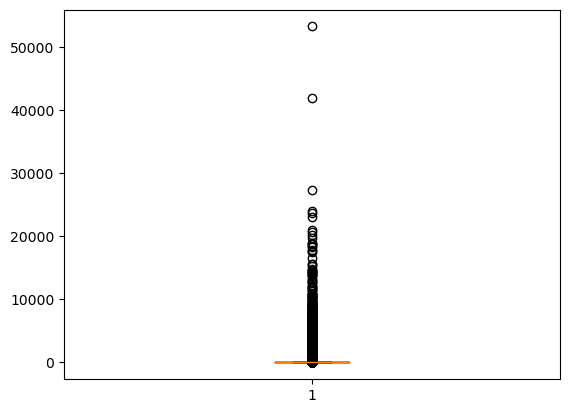

In [20]:
plt.boxplot(train['like_cnt'])

In [21]:
train['like_cnt'].describe()

count    109282.000000
mean         98.781629
std         572.854546
min           0.000000
25%           3.000000
50%           8.000000
75%          26.000000
max       53211.000000
Name: like_cnt, dtype: float64

In [22]:
train_ply_cut = train[(train['songs_cnt'] >= 5) & (train['songs_cnt'] <= 100) ]
train_ply_cut # 109282 -98302 = 10980

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[Pop],123815,1 1 환상의 케미스트리 211,"[243181, 520307, 291514, 496987, 285795, 68548...",0,2019-03-27 15:27:43.000,36
1,[팝],114252,1 HITS OF DECADE SPECIAL,"[527878, 344149, 156954, 492893, 33166, 218207...",1,2013-10-12 20:53:50.000,39
2,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37
3,[Pop],62278,100% 로맨틱 조지 마이클 223,"[366485, 435804, 442680, 538949, 263360, 29495...",0,2019-03-27 15:27:44.000,34
4,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16
...,...,...,...,...,...,...,...
109276,"[장르, 알엔비, 알엔비소울, 소울풀]",31642,00 R&B／Soul _ 장르,"[7730, 647775, 356025, 172750, 555157, 34548, ...",2,2020-04-23 00:13:14.000,17
109277,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,20
109279,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,59
109280,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,25


In [23]:
train_ply_cut['like_cnt'].describe()

count    98302.000000
mean        75.999278
std        428.501964
min          0.000000
25%          2.000000
50%          7.000000
75%         22.000000
max      53211.000000
Name: like_cnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14149ca57d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1414a0f4d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14149ca4e90>],
 'medians': [<matplotlib.lines.Line2D at 0x14149cc8650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1414746c910>],
 'means': []}

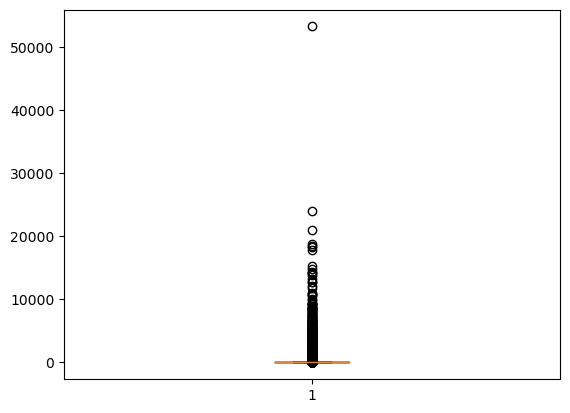

In [24]:
plt.boxplot(train_ply_cut['like_cnt'])

In [25]:
train_cut = train_ply_cut[train_ply_cut['like_cnt'] > 1].reset_index(drop=True)
train_cut

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37
1,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[588425, 407630, 235568, 347651, 194467, 42313...",353,2016-12-26 12:33:33.000,28
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 591246, 18938, 610105, 676958...",29,2009-12-22 09:11:45.000,34
4,[일렉],27984,1월의 최신 EDM 소식,"[329736, 201677, 626680, 555898, 58608, 585855...",84,2015-01-29 16:22:19.000,14
...,...,...,...,...,...,...,...
80948,"[장르, 알엔비, 알엔비소울, 소울풀]",31642,00 R&B／Soul _ 장르,"[7730, 647775, 356025, 172750, 555157, 34548, ...",2,2020-04-23 00:13:14.000,17
80949,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,20
80950,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,59
80951,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,25


In [26]:
train_cut['tags_cnt'] = train_cut['tags'].apply(lambda x : len(x))
train_cut

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt,tags_cnt
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 404318, 82686, ...",5,2009-07-11 21:37:42.000,37,1
1,"[기분좋은, 100번]",148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,16,2
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[588425, 407630, 235568, 347651, 194467, 42313...",353,2016-12-26 12:33:33.000,28,2
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 591246, 18938, 610105, 676958...",29,2009-12-22 09:11:45.000,34,1
4,[일렉],27984,1월의 최신 EDM 소식,"[329736, 201677, 626680, 555898, 58608, 585855...",84,2015-01-29 16:22:19.000,14,1
...,...,...,...,...,...,...,...,...
80948,"[장르, 알엔비, 알엔비소울, 소울풀]",31642,00 R&B／Soul _ 장르,"[7730, 647775, 356025, 172750, 555157, 34548, ...",2,2020-04-23 00:13:14.000,17,4
80949,[일렉],56144,00 Party 일렉트로댄스,"[256418, 183424, 431998, 654442, 354592, 24132...",7,2018-02-06 16:02:42.000,20,1
80950,[일렉],110536,0 일렉듣고 광질준비 O K _ElecVVIP,"[349306, 93890, 651902, 46845, 362347, 330768,...",173,2012-11-29 14:34:56.000,59,1
80951,"[비오는날, 추억, 회상]",106660,비오는날 듣기 좋은 연주곡 모음,"[79329, 51922, 173875, 216115, 422584, 509605,...",6,2015-10-06 11:45:24.000,25,3


{'whiskers': [<matplotlib.lines.Line2D at 0x14149c39d10>,
 'caps': [<matplotlib.lines.Line2D at 0x14149c3b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x14149c39190>],
 'medians': [<matplotlib.lines.Line2D at 0x14149804a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x14149c3a910>],
 'means': []}

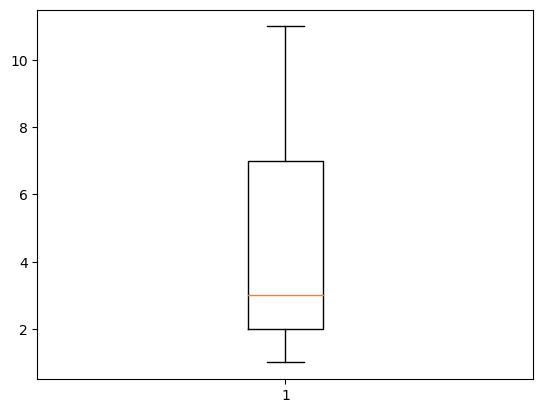

In [27]:
plt.boxplot(train_cut['tags_cnt'])

- 플레이리스트 특수문자 & 숫자로만 이루어진 것 삭제하기

In [33]:
# 플레이리스트 곡 기준, 좋아요 기준으로 삭제한 train_cut 파일의 플레이리스트 전처리

condition = train_cut['plylst_title'].str.match('^[\d\W]+$')
result = train_cut[condition]['id']
len(result)

37

In [30]:
train_cut[train_cut['id'].isin(list(result))][:50]

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt,tags_cnt
71458,"[스트레스, 기분전환]",94337,✪‿,"[599428, 193466, 122385, 561832, 289878, 35575...",14,2018-05-25 10:59:31.000,19,2
71662,"[기분전환, 드라이브]",6633,⌒▽⌒,"[173597, 448568, 374775, 546517, 208424, 43893...",2,2019-08-27 08:26:03.000,42,2
71693,"[Lofi, lofihiphap, Lofihiphop, jazzhiphop]",3789,‭ ‭ ‭ ‭,"[500540, 160064, 70721, 266741, 692979, 272193...",13,2020-03-20 06:14:32.000,31,4
71787,"[슬픔, 밤, 이별, 새벽]",127499,×÷,"[163664, 339802, 221851, 563592, 7969, 327730,...",24,2017-04-03 02:54:32.000,58,4
71788,"[드라이브, 팝송, 신나는]",81253,××××,"[563111, 233765, 619719, 439301, 383011, 70343...",5,2019-04-01 11:08:14.000,49,3
77792,"[슬픔, 이별, 잔잔한]",145930,; ; ; ; ;,"[673883, 17930, 43874, 482772, 668763, 82675, ...",17,2018-02-05 00:13:54.000,29,3
78202,"[추억, 회상]",23616,80 90,"[224139, 587820, 430005, 384803, 416707, 48687...",10,2015-08-19 17:13:35.000,42,2
78370,"[밤, 까페, 새벽]",100319,6 06,"[318917, 390333, 504336, 59926, 623801, 324757...",9,2018-07-17 14:25:35.000,84,3
78973,"[힙합, 옥콩, 알앤비, RandB, 드라이브, drive, HipHop]",117953,2020 02 21,"[101894, 660969, 118934, 384323, 244254, 12678...",4,2020-02-21 11:16:17.000,9,7
79356,"[폴킴, 소원]",72743,2018 2 16,"[622717, 447336, 22845, 60157, 693112, 282416,...",3,2018-03-30 10:07:03.000,19,2


In [68]:
115071 - 114978

93